# Elon Musk

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

In [ ]:
tweet=pd.read_csv('Elon_musk.csv',encoding='Latin-1')
tweet

Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [ ]:
tweet.drop(['Unnamed: 0'],inplace=True,axis=1)
tweet

Text
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

In [ ]:
tweet=[Text.strip() for Text in tweet.Text]
tweet=[Text for Text in tweet if Text]
tweet[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [ ]:
text=''.join(tweet)
text

'@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is 

In [ ]:
no_punc_text=text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'kunalb11 I\x92m an alienIDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried itjoerogan Spotify Great interviewgtera27 Doge is underestimatedteslacn Congratulations Tesla China for amazing execution last year Now on to the next for even moreHappy New Year of the Ox httpstco9WFKMYu2ojFrodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrMOwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likelyGiveDirectly Just sent someJust agree to do Clubhouse with kanyewesthttpstco3rWE9uHSTSgeoffkeighley UnrealEngine It\x92s getting realBought some Dogecoin for lil X so he can be a toddler hodlerJoshManMode He definitely has issues but the sentencing seems a bit highfreewalletorg Thanks for fixingfreewalletorg Please unlock my accountAstroJordy U0001F923U0001F923This is true power haha httpstcoFc9uhQSd7Ofreewalletorg Any crypto wa

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
text_tokens=word_tokenize(no_punc_text)
print(text_tokens)

['kunalb11', 'I\x92m', 'an', 'alienIDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'itjoerogan', 'Spotify', 'Great', 'interviewgtera27', 'Doge', 'is', 'underestimatedteslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'moreHappy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2ojFrodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'httpstcozGxJFDzzrMOwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocationThe', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likelyGiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewesthttpstco3rWE9uHSTSgeoffkeighley', 'UnrealEngine', 'It\x92s', 'getting', 'realBought', 'some', 'Dogecoin'

In [ ]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)


['kunalb11', 'I\x92m', 'alienIDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'itjoerogan', 'Spotify', 'Great', 'interviewgtera27', 'Doge', 'underestimatedteslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'moreHappy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2ojFrodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrMOwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocationThe', 'entertaining', 'outcome', 'likelyGiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'Clubhouse', 'kanyewesthttpstco3rWE9uHSTSgeoffkeighley', 'UnrealEngine', 'It\x92s', 'getting', 'realBought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodlerJoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'highfreewalletorg', 'Thanks', 'fixingfreewalletorg', 'Please', 'unlock', 'accountAstroJor

In [ ]:
lower_words=[Text.lower() for Text in no_stop_tokens]
lower_words[0:20]

['kunalb11',
 'i\x92m',
 'alienidaacarmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tried',
 'itjoerogan',
 'spotify',
 'great',
 'interviewgtera27',
 'doge',
 'underestimatedteslacn',
 'congratulations',
 'tesla',
 'china',
 'amazing']

In [ ]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
stemmed_tokens[0:20]

['kunalb11',
 'i\x92m',
 'alienidaacarmack',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tri',
 'itjoerogan',
 'spotifi',
 'great',
 'interviewgtera27',
 'doge',
 'underestimatedteslacn',
 'congratul',
 'tesla',
 'china',
 'amaz']

In [ ]:
nlp=spacy.load('en_core_web_sm')

In [ ]:
doc=nlp(' '.join(no_stop_tokens))
doc[0:20]

kunalb11 Im alienIDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried itjoerogan Spotify Great interviewgtera27 Doge underestimatedteslacn Congratulations Tesla China amazing

In [ ]:
lemma=[no_stop_tokens.lemma_ for no_stop_tokens in doc]
print(lemma[0:20])

['kunalb11', 'I\x92m', 'alienidaacarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'itjoerogan', 'spotify', 'great', 'interviewgtera27', 'Doge', 'underestimatedteslacn', 'Congratulations', 'Tesla', 'China', 'amazing']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
tweetsVec=vectorizer.fit_transform(lemma)
vectorizer.vocabulary_

{'kunalb11': 2871,
 'alienidaacarmack': 246,
 'ray': 3883,
 'trace': 4873,
 'cyberpunk': 1011,
 'hdr': 1849,
 'nextlevel': 3374,
 'have': 1844,
 'try': 4935,
 'itjoerogan': 2757,
 'spotify': 4427,
 'great': 1745,
 'interviewgtera27': 2724,
 'doge': 1172,
 'underestimatedteslacn': 5133,
 'congratulations': 886,
 'tesla': 4677,
 'china': 769,
 'amazing': 274,
 'execution': 1418,
 'last': 2893,
 'year': 5445,
 'now': 3420,
 'next': 3373,
 'even': 1371,
 'morehappy': 3273,
 'new': 3371,
 'ox': 3552,
 'httpstco9wfkmyu2ojfrodo': 2038,
 'underdoge': 5132,
 'all': 249,
 'thought': 4766,
 'would': 5410,
 'fail': 1456,
 'himself': 1898,
 'httpstcozgxjfdzzrmowensparks': 2552,
 'flcnhvy': 1544,
 'anonyx10': 304,
 'haha': 1786,
 'thanks': 4718,
 'indeed': 2650,
 'tweets': 4958,
 'definitely': 1067,
 'represent': 3964,
 'realworld': 3910,
 'time': 4789,
 'allocationthe': 253,
 'entertaining': 1326,
 'outcome': 3526,
 'likelygivedirectly': 2963,
 'just': 2821,
 'send': 4165,
 'somejust': 4339,
 'agre

In [ ]:
print(tweetsVec.toarray()[20:50])
print(tweetsVec.toarray().shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(13726, 5536)


In [ ]:
vectorizer_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=vectorizer_ngram_range.fit_transform(lemma)

In [ ]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemma)

In [ ]:

print(tfidf_matix_ngram.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


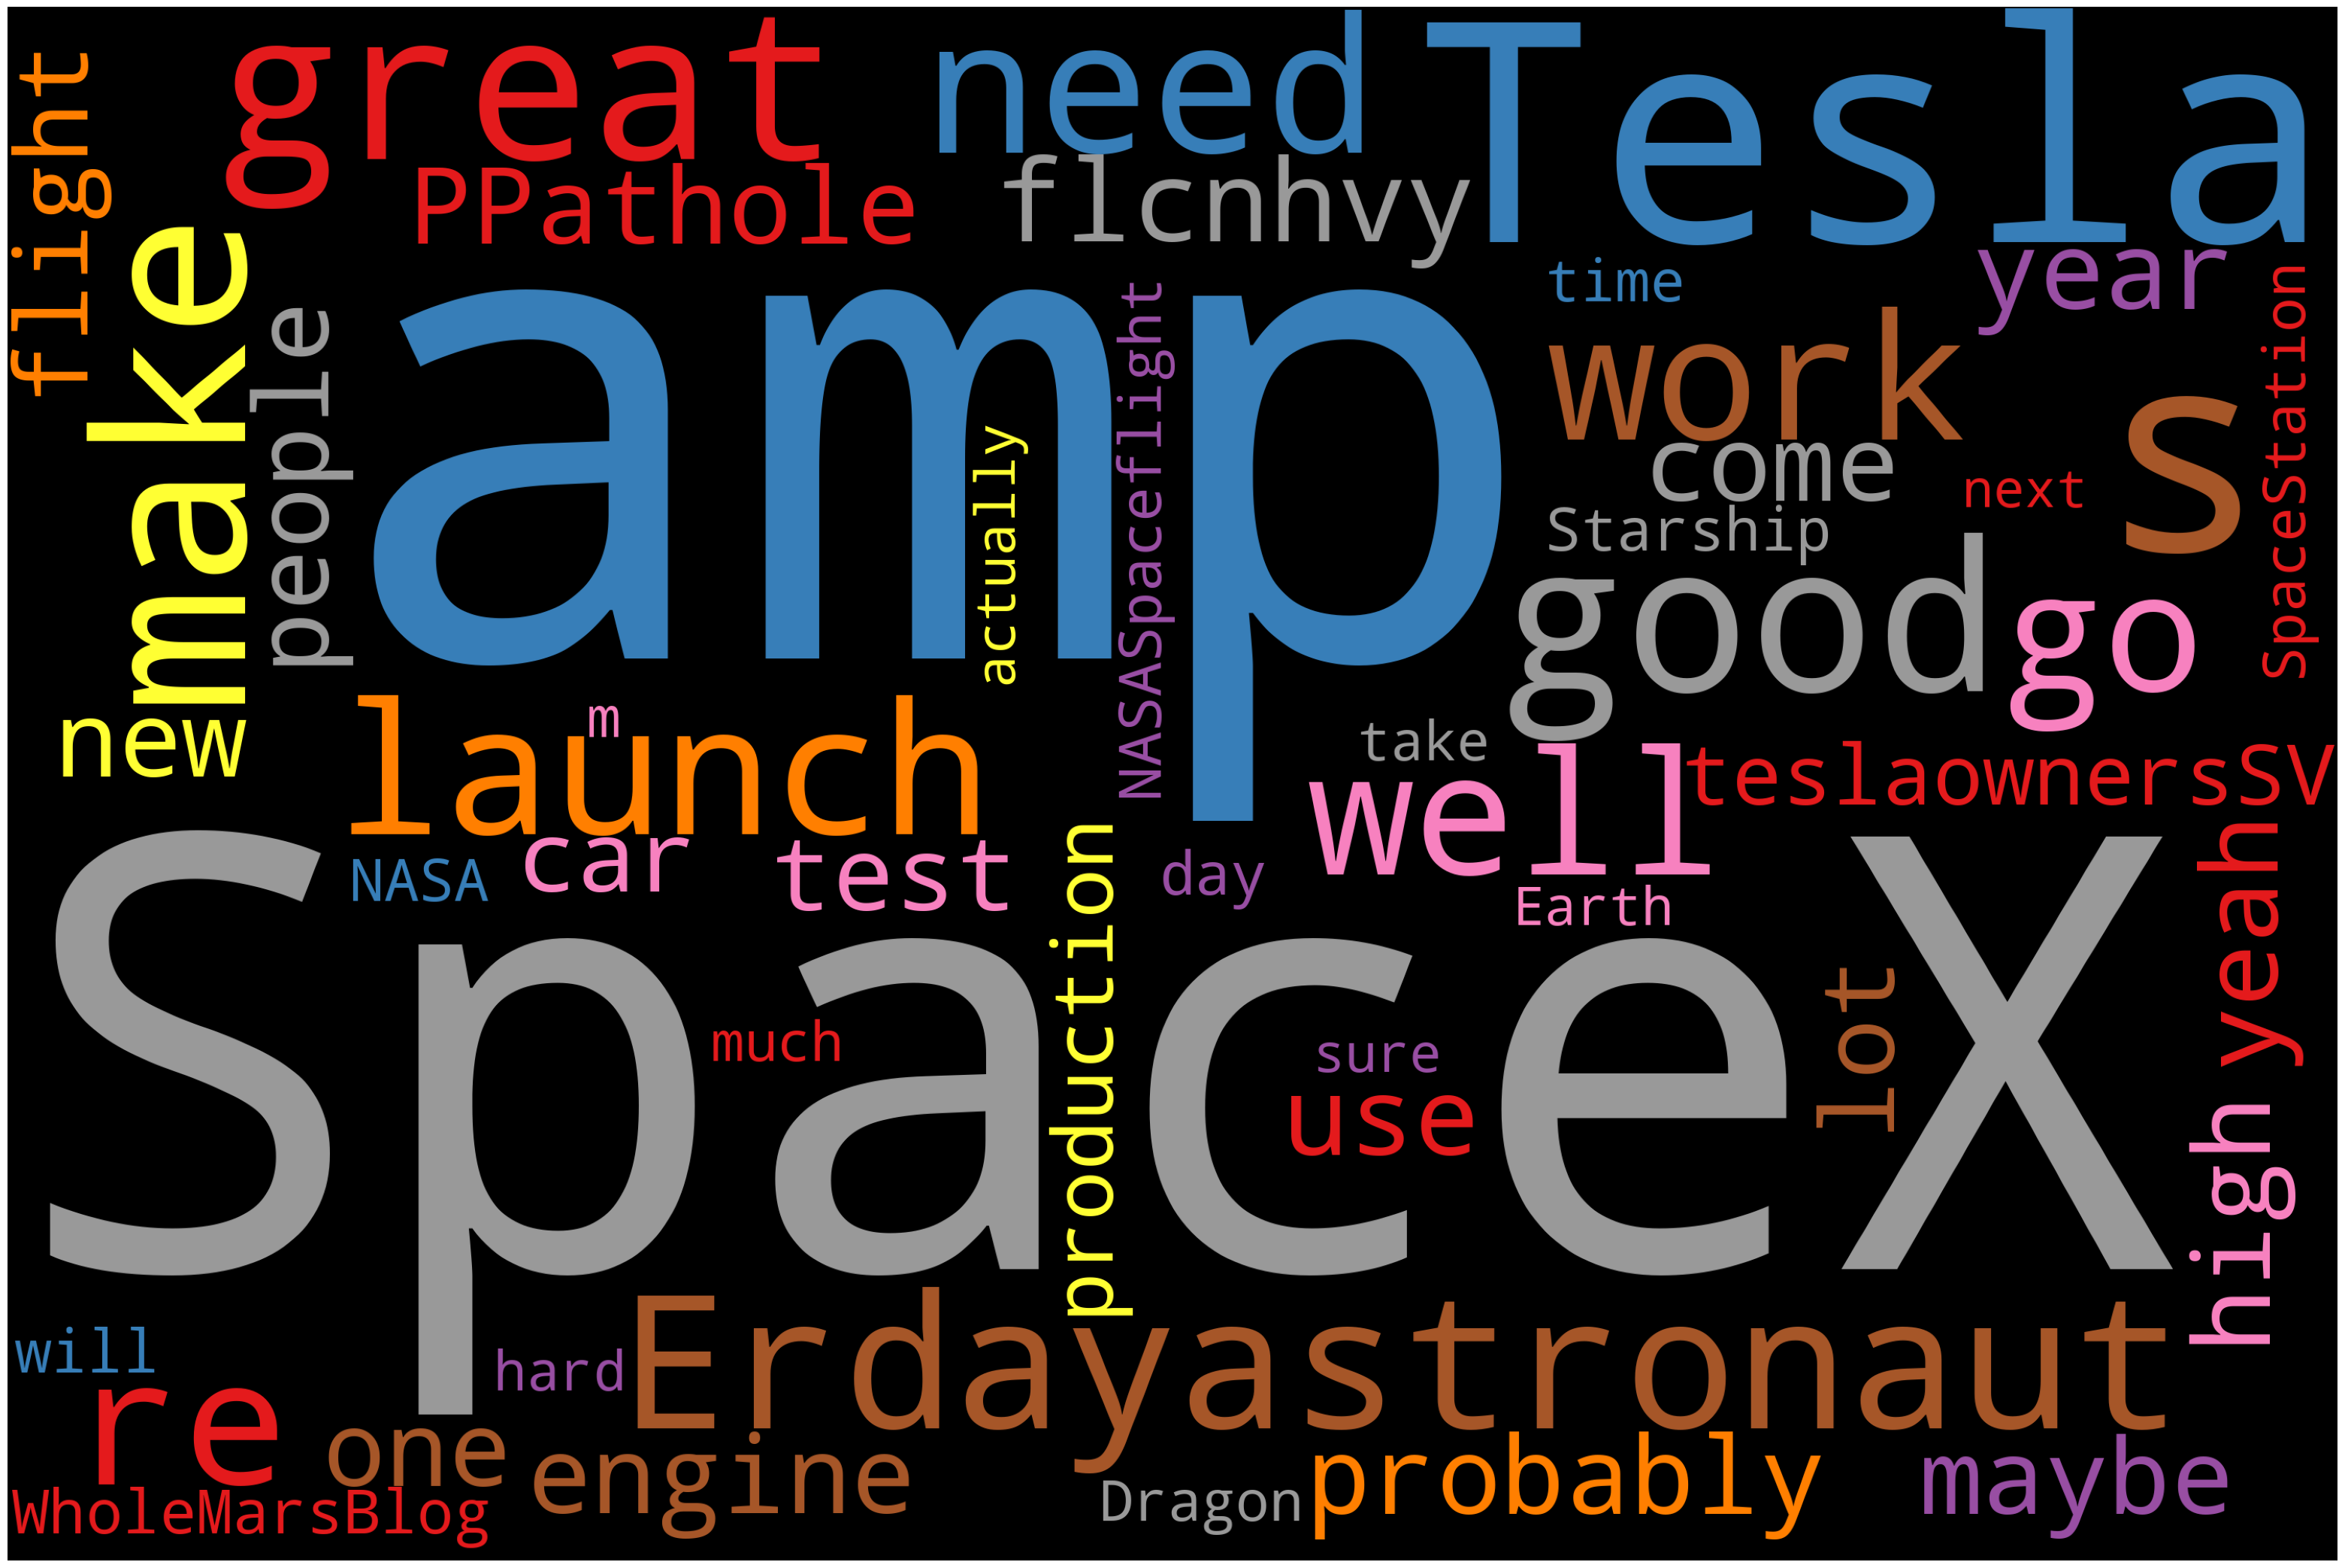

In [ ]:
clean_tweets=' '.join(lemma)
clean_tweets
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

In [ ]:
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[200:300]:
    print(token,token.pos_)

work NOUN
gocapybarasurfer NOUN
mattwallace888 PROPN
do AUX
seem VERB
bit NOUN
highitsALLrisky PROPN
Doge PROPN
appear VERB
inflationary ADJ
meaningfully ADV
fix VERB
coin PROPN
per ADP
unit NOUN
time NOUN
whereas SCONJ
httpstco4uh4rarc6tmichaelgalanin PROPN
kevinmgill NOUN
WowErdayastronaut PROPN
michaelhodapp VERB
1 NUM
orbital ADJ
launch NOUN
tower NOUN
stack NOUN
2 NUM
enough ADJ
Raptors NOUN
orbit VERB
booster NOUN
3 NUM
improve VERB
ship NOUN
amp NOUN
booster NOUN
massmichaelhodapp NOUN
back ADV
work NOUN
tonightð NOUN
Ðogecoin PROPN
instructional ADJ
video NOUN
httpstcoueeocofctbthe PROPN
people NOUN
speak VERB
httpstcox41ovmztgonivetha742 X
lexfridman NOUN
so ADV
cute VERB
u0001f495univercurious ADJ
extremely ADV
misleading ADJ
image NOUN
doesnt PUNCT
reflect NOUN
true ADJ
time NOUN
cost NOUN
people NOUN
rain VERB
amp PROPN
painu0001f3b6 PROPN
who PRON
let VERB
Doge PROPN
U0001F3B6Hodl ADJ
rainforestsso NOUN
its PROPN
finally ADV
come VERB
httpstcogf0rg2qoafitsallrisky ADJ
It

In [ ]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(tweet))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [ ]:
sentence_df=pd.DataFrame(sentences,columns=['sentence'])
sentence_df

sentence
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated @teslacn Congr...
4                   Now on to the next for even more!!
..                                                 ...
922  @kenyanwalstreet Not actually a payout, just a...
923  It may never pay out, as the stock cant b
 ht...
924                                    Details Aug 28.
925  AI symbiosis while u wait @vistacruiser7 @flcn...
926  @TeslaGong @PPathole Samwise Gamgee @PPathole ...

[927 rows x 1 columns]

In [ ]:
affin=pd.read_csv('Afinn (1).csv',sep=',',encoding='Latin-1')
affin

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [ ]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [ ]:
calculate_sentiment(text='great')

3

In [ ]:
sentence_df['sentiment_value']=sentence_df['sentence'].apply(calculate_sentiment)
sentence_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
922    0
923   -4
924    0
925   -2
926    0
Name: sentiment_value, Length: 927, dtype: int64

In [ ]:
sentence_df['word_count']=sentence_df['sentence'].str.split().apply(len)
sentence_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
922    11
923    31
924     3
925    47
926    15
Name: word_count, Length: 927, dtype: int64

In [ ]:
sentence_df.sort_values(by='sentiment_value')

sentence  sentiment_value  \
840  Cool Model 3 review by @iamjamiefoxx https://t...               -8   
650  Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...               -8   
64   Also, the road to hell is mostly paved with ba...               -7   
923  It may never pay out, as the stock cant b
 ht...               -4   
683  Occasional flights from land are ok, but frequ...               -4   
..                                                 ...              ...   
648  Its
 https://t.co/IxhyT6NuiC @Teslarati Tesla...               13   
588  The open areas
 https://t.co/rabjKrtQlw @Sav...               14   
105  @Erdayastronaut @SpaceX Was also thinking that...               16   
36   @ajtourville @Erdayastronaut @SpaceX Yes, but ...               16   
722  We just havent observed the
 https://t.co/mez...               17   

     word_count  
840          61  
650          60  
64           11  
923          31  
683          39  
..          ...  
648          65  
588         138  
105          94  
36          231  
722          72  

[927 rows x 3 columns]

In [ ]:
sentence_df[sentence_df['sentiment_value']<=0]

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
4                   Now on to the next for even more!!                0   
5                            Happy New Year of the Ox!                0   
6    https://t.co/9WFKMYu2oj Frodo was the underdog...               -2   
..                                                 ...              ...   
922  @kenyanwalstreet Not actually a payout, just a...                0   
923  It may never pay out, as the stock cant b
 ht...               -4   
924                                    Details Aug 28.                0   
925  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
926  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  
0            13  
1             4  
4             8  
5             6  
6            14  
..          ...  
922          11  
923          31  
924           3  
925          47  
926          15  

[492 rows x 3 columns]

In [ ]:
sentence_df[sentence_df['sentiment_value']>0]

sentence  sentiment_value  \
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
7    https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...                2   
9    The most entertaining outcome is the most like...                3   
17   Back to work I go @CapybaraSurfer @MattWallace...                4   
..                                                 ...              ...   
914                       He was one of the very best.                3   
916  @Ali_Afshari In general, we need to improve ho...                4   
918  @burakaydik True Wow, IHOP &amp; GitHub are cl...                3   
920               This is both great &amp; terrifying.                3   
921  Everything weve ever sensed or thought has be...                2   

     word_count  
2             4  
3            13  
7            10  
9           109  
17           38  
..          ...  
914           7  
916          87  
918          15  
920           6  
921          17  

[435 rows x 3 columns]

<ipython-input-76-c46f2fdaee32>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sentence_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

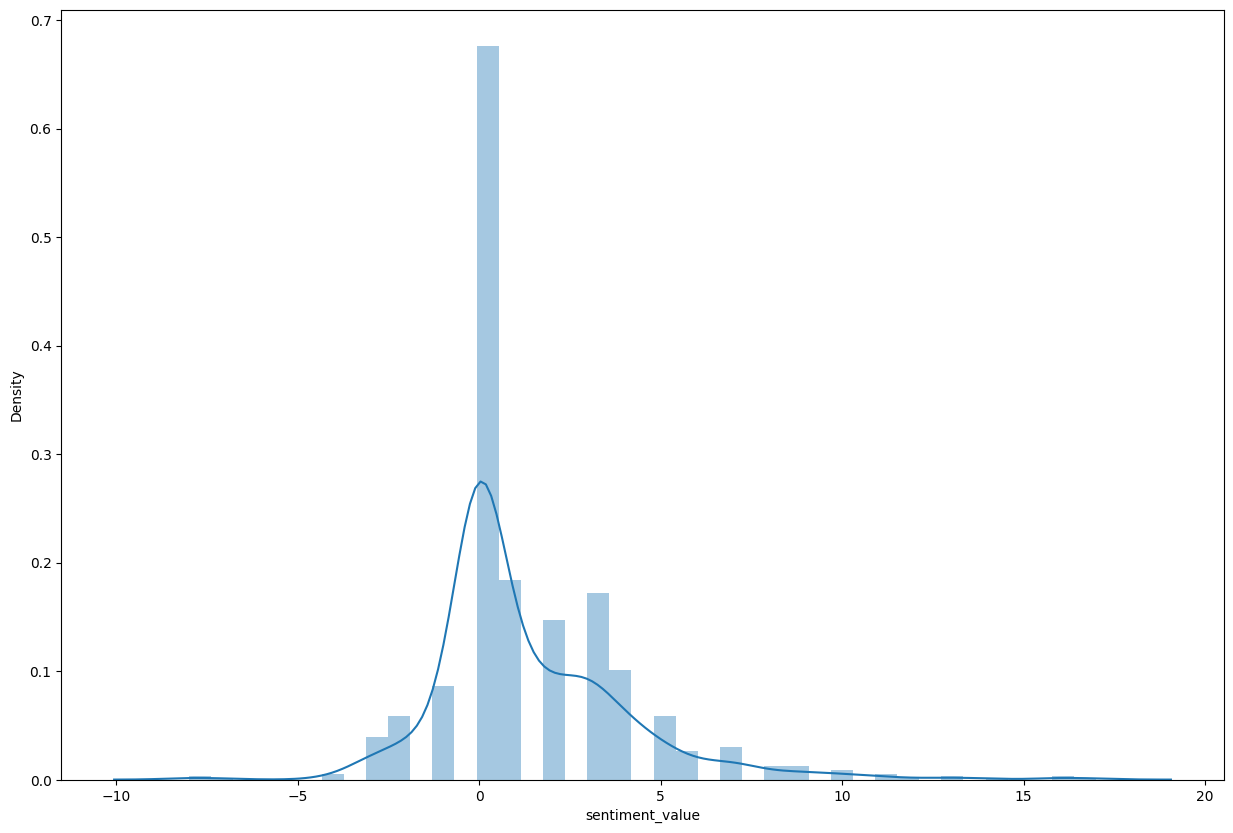

In [ ]:

plt.figure(figsize=(15,10))
sns.distplot(sentence_df['sentiment_value'])

In [ ]:
sentence_df['index']=range(0,len(sentence_df))
sentence_df

sentence  sentiment_value  \
0    @kunalb11 Im an alien @ID_AA_Carmack Ray trac...                0   
1                                   Have you tried it?                0   
2                  @joerogan @Spotify Great interview!                3   
3    @gtera27 Doge is underestimated @teslacn Congr...                3   
4                   Now on to the next for even more!!                0   
..                                                 ...              ...   
922  @kenyanwalstreet Not actually a payout, just a...                0   
923  It may never pay out, as the stock cant b
 ht...               -4   
924                                    Details Aug 28.                0   
925  AI symbiosis while u wait @vistacruiser7 @flcn...               -2   
926  @TeslaGong @PPathole Samwise Gamgee @PPathole ...                0   

     word_count  index  
0            13      0  
1             4      1  
2             4      2  
3            13      3  
4             8      4  
..          ...    ...  
922          11    922  
923          31    923  
924           3    924  
925          47    925  
926          15    926  

[927 rows x 4 columns]

<Axes: xlabel='index', ylabel='sentiment_value'>

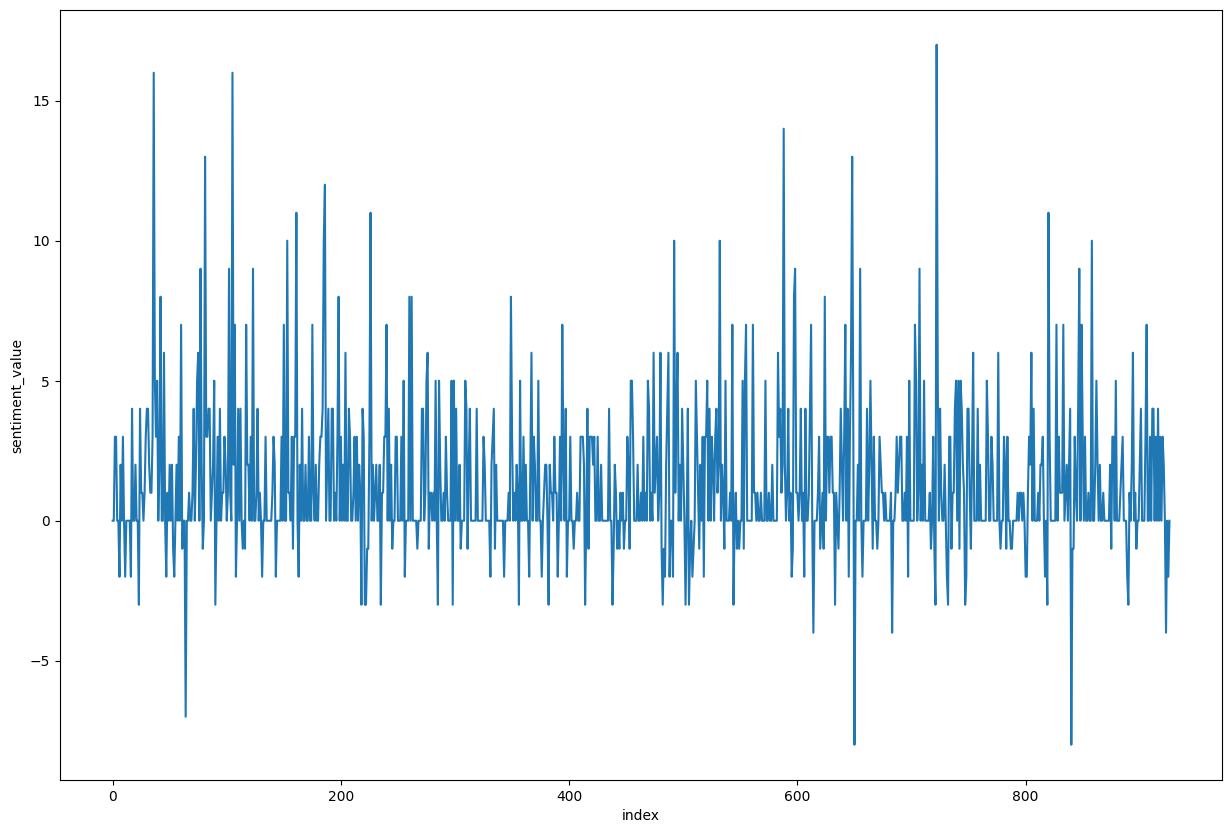

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sentence_df)

# Question 2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

In [19]:
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [21]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [22]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [23]:
reviewlist = []
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [24]:
reviewlist = []
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [25]:
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

<ipython-input-25-6e4322541d2b>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [26]:
df = pd.DataFrame(reviewlist)
df.to_csv("Amazon_Reviews_Oneplus_Nord_CE2.csv")


In [27]:
import re
import time
import string
import warnings
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
reviews=pd.read_csv('Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews

Unnamed: 0  Rating                                              Title  \
0           0     4.0           4.0 out of 5 stars\nProblem of sim tray.   
1           1     4.0  4.0 out of 5 stars\nGood phone-could have been...   
2           2     4.0         4.0 out of 5 stars\nA mildly perfect phone   
3           3     4.0         4.0 out of 5 stars\nBattery backup too low   
4           4     4.0             4.0 out of 5 stars\nBattery and camera   
5           5     4.0                      4.0 out of 5 stars\nVery good   
6           6     4.0                 4.0 out of 5 stars\nValue of money   
7           7     4.0                 4.0 out of 5 stars\nAWESOME MOBILE   
8           8     4.0         4.0 out of 5 stars\nAll functions are good   
9           9     4.0                  4.0 out of 5 stars\nNice products   

                                              Review       Review_Date  
0  The product is good but I m not satisy with it...      11 July 2023  
1  I've purchased the 6GB version of this phone w...  19 December 2022  
2  I will try to keep this review short. This rev...   12 January 2023  
3  I brought this phone last month and if you use...       8 July 2023  
4  Battery backup is really nice, camera also awe...       9 July 2023  
5                               Very good experience      10 July 2023  
6                                   Worthy for money      10 July 2023  
7                             VERY VERY GOOD PRODUCT       7 July 2023  
8                                          Good fone       9 July 2023  
9  It's a nice product but company claimed it wil...       8 July 2023

In [29]:
reviews=[Review.strip() for Review in reviews.Review]
reviews=[Review for Review in reviews if Review]
reviews[0:10]

['The product is good but I m not satisy with its sim tray. I have 2 sim and 1 memory card. How can I used them togher in this product? If you have any sim tray for this product which has space of 2sim and memory card . so please give , or otherwise please exchange it with other mobile which has all these facilities. Thank you.',
 "I've purchased the 6GB version of this phone which comes with an extendable 2 GB RAM (virtual memory) capability.Good phone, but being the least expensive category offering from One-plus, there are some small evident points that will get noticed. First thing is the confusing placement of the power button (and hence the finger sensor). Daily handling of the mobile phone feels a bit annoying with fingers locking/un-locking the phone while you try to handle it and place it into Your pockets. Although this is not a big problem, it is still something to think about. The second point is about lag here and there (only to a noticeable bit), which i am hoping might g

In [30]:
review_text=' '.join(reviews)
review_text

"The product is good but I m not satisy with its sim tray. I have 2 sim and 1 memory card. How can I used them togher in this product? If you have any sim tray for this product which has space of 2sim and memory card . so please give , or otherwise please exchange it with other mobile which has all these facilities. Thank you. I've purchased the 6GB version of this phone which comes with an extendable 2 GB RAM (virtual memory) capability.Good phone, but being the least expensive category offering from One-plus, there are some small evident points that will get noticed. First thing is the confusing placement of the power button (and hence the finger sensor). Daily handling of the mobile phone feels a bit annoying with fingers locking/un-locking the phone while you try to handle it and place it into Your pockets. Although this is not a big problem, it is still something to think about. The second point is about lag here and there (only to a noticeable bit), which i am hoping might go awa

In [32]:
no_punc_text=review_text.translate(str.maketrans('','',string.punctuation))

In [33]:
review_text_tokens=word_tokenize(no_punc_text)
print(review_text_tokens)

['The', 'product', 'is', 'good', 'but', 'I', 'm', 'not', 'satisy', 'with', 'its', 'sim', 'tray', 'I', 'have', '2', 'sim', 'and', '1', 'memory', 'card', 'How', 'can', 'I', 'used', 'them', 'togher', 'in', 'this', 'product', 'If', 'you', 'have', 'any', 'sim', 'tray', 'for', 'this', 'product', 'which', 'has', 'space', 'of', '2sim', 'and', 'memory', 'card', 'so', 'please', 'give', 'or', 'otherwise', 'please', 'exchange', 'it', 'with', 'other', 'mobile', 'which', 'has', 'all', 'these', 'facilities', 'Thank', 'you', 'Ive', 'purchased', 'the', '6GB', 'version', 'of', 'this', 'phone', 'which', 'comes', 'with', 'an', 'extendable', '2', 'GB', 'RAM', 'virtual', 'memory', 'capabilityGood', 'phone', 'but', 'being', 'the', 'least', 'expensive', 'category', 'offering', 'from', 'Oneplus', 'there', 'are', 'some', 'small', 'evident', 'points', 'that', 'will', 'get', 'noticed', 'First', 'thing', 'is', 'the', 'confusing', 'placement', 'of', 'the', 'power', 'button', 'and', 'hence', 'the', 'finger', 'sensor

In [34]:
my_stop_words=stopwords.words('english')
no_stop_tokens=[word for word in review_text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['The', 'product', 'good', 'I', 'satisy', 'sim', 'tray', 'I', '2', 'sim', '1', 'memory', 'card', 'How', 'I', 'used', 'togher', 'product', 'If', 'sim', 'tray', 'product', 'space', '2sim', 'memory', 'card', 'please', 'give', 'otherwise', 'please', 'exchange', 'mobile', 'facilities', 'Thank', 'Ive', 'purchased', '6GB', 'version', 'phone', 'comes', 'extendable', '2', 'GB', 'RAM', 'virtual', 'memory', 'capabilityGood', 'phone', 'least', 'expensive', 'category', 'offering', 'Oneplus', 'small', 'evident', 'points', 'get', 'noticed', 'First', 'thing', 'confusing', 'placement', 'power', 'button', 'hence', 'finger', 'sensor', 'Daily', 'handling', 'mobile', 'phone', 'feels', 'bit', 'annoying', 'fingers', 'lockingunlocking', 'phone', 'try', 'handle', 'place', 'Your', 'pockets', 'Although', 'big', 'problem', 'still', 'something', 'think', 'The', 'second', 'point', 'lag', 'noticeable', 'bit', 'hoping', 'might', 'go', 'away', 'updatesimprovements', 'The', 'third', 'point', 'speaker', 'volume', 'The',

In [35]:
lower_words=[Review.lower() for Review in no_stop_tokens]
lower_words

['the',
 'product',
 'good',
 'i',
 'satisy',
 'sim',
 'tray',
 'i',
 '2',
 'sim',
 '1',
 'memory',
 'card',
 'how',
 'i',
 'used',
 'togher',
 'product',
 'if',
 'sim',
 'tray',
 'product',
 'space',
 '2sim',
 'memory',
 'card',
 'please',
 'give',
 'otherwise',
 'please',
 'exchange',
 'mobile',
 'facilities',
 'thank',
 'ive',
 'purchased',
 '6gb',
 'version',
 'phone',
 'comes',
 'extendable',
 '2',
 'gb',
 'ram',
 'virtual',
 'memory',
 'capabilitygood',
 'phone',
 'least',
 'expensive',
 'category',
 'offering',
 'oneplus',
 'small',
 'evident',
 'points',
 'get',
 'noticed',
 'first',
 'thing',
 'confusing',
 'placement',
 'power',
 'button',
 'hence',
 'finger',
 'sensor',
 'daily',
 'handling',
 'mobile',
 'phone',
 'feels',
 'bit',
 'annoying',
 'fingers',
 'lockingunlocking',
 'phone',
 'try',
 'handle',
 'place',
 'your',
 'pockets',
 'although',
 'big',
 'problem',
 'still',
 'something',
 'think',
 'the',
 'second',
 'point',
 'lag',
 'noticeable',
 'bit',
 'hoping',
 'mi

In [36]:
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[50:100])

['categori', 'offer', 'oneplu', 'small', 'evid', 'point', 'get', 'notic', 'first', 'thing', 'confus', 'placement', 'power', 'button', 'henc', 'finger', 'sensor', 'daili', 'handl', 'mobil', 'phone', 'feel', 'bit', 'annoy', 'finger', 'lockingunlock', 'phone', 'tri', 'handl', 'place', 'your', 'pocket', 'although', 'big', 'problem', 'still', 'someth', 'think', 'the', 'second', 'point', 'lag', 'notic', 'bit', 'hope', 'might', 'go', 'away', 'updatesimprov', 'the']


In [37]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

the product good i satisy sim tray i 2 sim 1 memory card how i used togher product if sim tray product space 2sim memory card please give otherwise please exchange mobile facilities thank ive purchased 6gb version phone comes extendable 2 gb ram virtual memory capabilitygood phone least expensive category offering oneplus small evident points get noticed first thing confusing placement power button hence finger sensor daily handling mobile phone feels bit annoying fingers lockingunlocking phone try handle place your pockets although big problem still something think the second point lag noticeable bit hoping might go away updatesimprovements the third point speaker volume the speaker good near maximum levels ie volume seem creep steadily rather louds top volume limits the fourth point final one camera shoots colors realistic photos taken day light especially skin tone tend coloured led flash average could betterthe good awesome part phone practicality daily users oneplus strong brand p

In [38]:
lemmas=[review_text_token.lemma_ for review_text_token in doc]
print(lemmas)

['the', 'product', 'good', 'I', 'satisy', 'sim', 'tray', 'i', '2', 'sim', '1', 'memory', 'card', 'how', 'I', 'use', 'togher', 'product', 'if', 'sim', 'tray', 'product', 'space', '2sim', 'memory', 'card', 'please', 'give', 'otherwise', 'please', 'exchange', 'mobile', 'facility', 'thank', 'I', 've', 'purchase', '6', 'gb', 'version', 'phone', 'come', 'extendable', '2', 'gb', 'ram', 'virtual', 'memory', 'capabilitygood', 'phone', 'least', 'expensive', 'category', 'offer', 'oneplus', 'small', 'evident', 'point', 'get', 'notice', 'first', 'thing', 'confuse', 'placement', 'power', 'button', 'hence', 'finger', 'sensor', 'daily', 'handle', 'mobile', 'phone', 'feel', 'bit', 'annoying', 'finger', 'lockingunlocke', 'phone', 'try', 'handle', 'place', 'your', 'pocket', 'although', 'big', 'problem', 'still', 'something', 'think', 'the', 'second', 'point', 'lag', 'noticeable', 'bit', 'hope', 'might', 'go', 'away', 'updatesimprovement', 'the', 'third', 'point', 'speaker', 'volume', 'the', 'speaker', 'g

In [39]:
clean_review=' '.join(lemmas)
clean_review

'the product good I satisy sim tray i 2 sim 1 memory card how I use togher product if sim tray product space 2sim memory card please give otherwise please exchange mobile facility thank I ve purchase 6 gb version phone come extendable 2 gb ram virtual memory capabilitygood phone least expensive category offer oneplus small evident point get notice first thing confuse placement power button hence finger sensor daily handle mobile phone feel bit annoying finger lockingunlocke phone try handle place your pocket although big problem still something think the second point lag noticeable bit hope might go away updatesimprovement the third point speaker volume the speaker good near maximum level ie volume seem creep steadily rather louds top volume limit the fourth point final one camera shoot color realistic photo take day light especially skin tone tend colour lead flash average could betterthe good awesome part phone practicality daily user oneplu strong brand part pricing offer battery li

In [47]:
vectorizer=CountVectorizer()
reviews_v=vectorizer.fit_transform(lemmas)
vectorizer.vocabulary_

{'the': 215,
 'product': 171,
 'good': 93,
 'satisy': 182,
 'sim': 191,
 'tray': 228,
 'memory': 128,
 'card': 45,
 'how': 101,
 'use': 235,
 'togher': 224,
 'if': 103,
 'space': 200,
 '2sim': 3,
 'please': 160,
 'give': 91,
 'otherwise': 152,
 'exchange': 72,
 'mobile': 133,
 'facility': 77,
 'thank': 214,
 've': 237,
 'purchase': 172,
 'gb': 88,
 'version': 238,
 'phone': 156,
 'come': 55,
 'extendable': 75,
 'ram': 174,
 'virtual': 240,
 'capabilitygood': 44,
 'least': 116,
 'expensive': 73,
 'category': 47,
 'offer': 148,
 'oneplus': 151,
 'small': 193,
 'evident': 71,
 'point': 163,
 'get': 90,
 'notice': 146,
 'first': 84,
 'thing': 217,
 'confuse': 59,
 'placement': 159,
 'power': 164,
 'button': 40,
 'hence': 97,
 'finger': 83,
 'sensor': 187,
 'daily': 63,
 'handle': 95,
 'feel': 81,
 'bit': 31,
 'annoying': 17,
 'lockingunlocke': 123,
 'try': 229,
 'place': 158,
 'your': 247,
 'pocket': 162,
 'although': 14,
 'big': 30,
 'problem': 170,
 'still': 205,
 'something': 198,
 'thi

In [49]:
print(reviews_v.toarray()[100:200])
print(reviews_v.toarray().shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(380, 249)


In [51]:
vec_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=vec_ngram_range.fit_transform(lemmas)
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [53]:
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [54]:
print(tfidf_matix_ngram.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


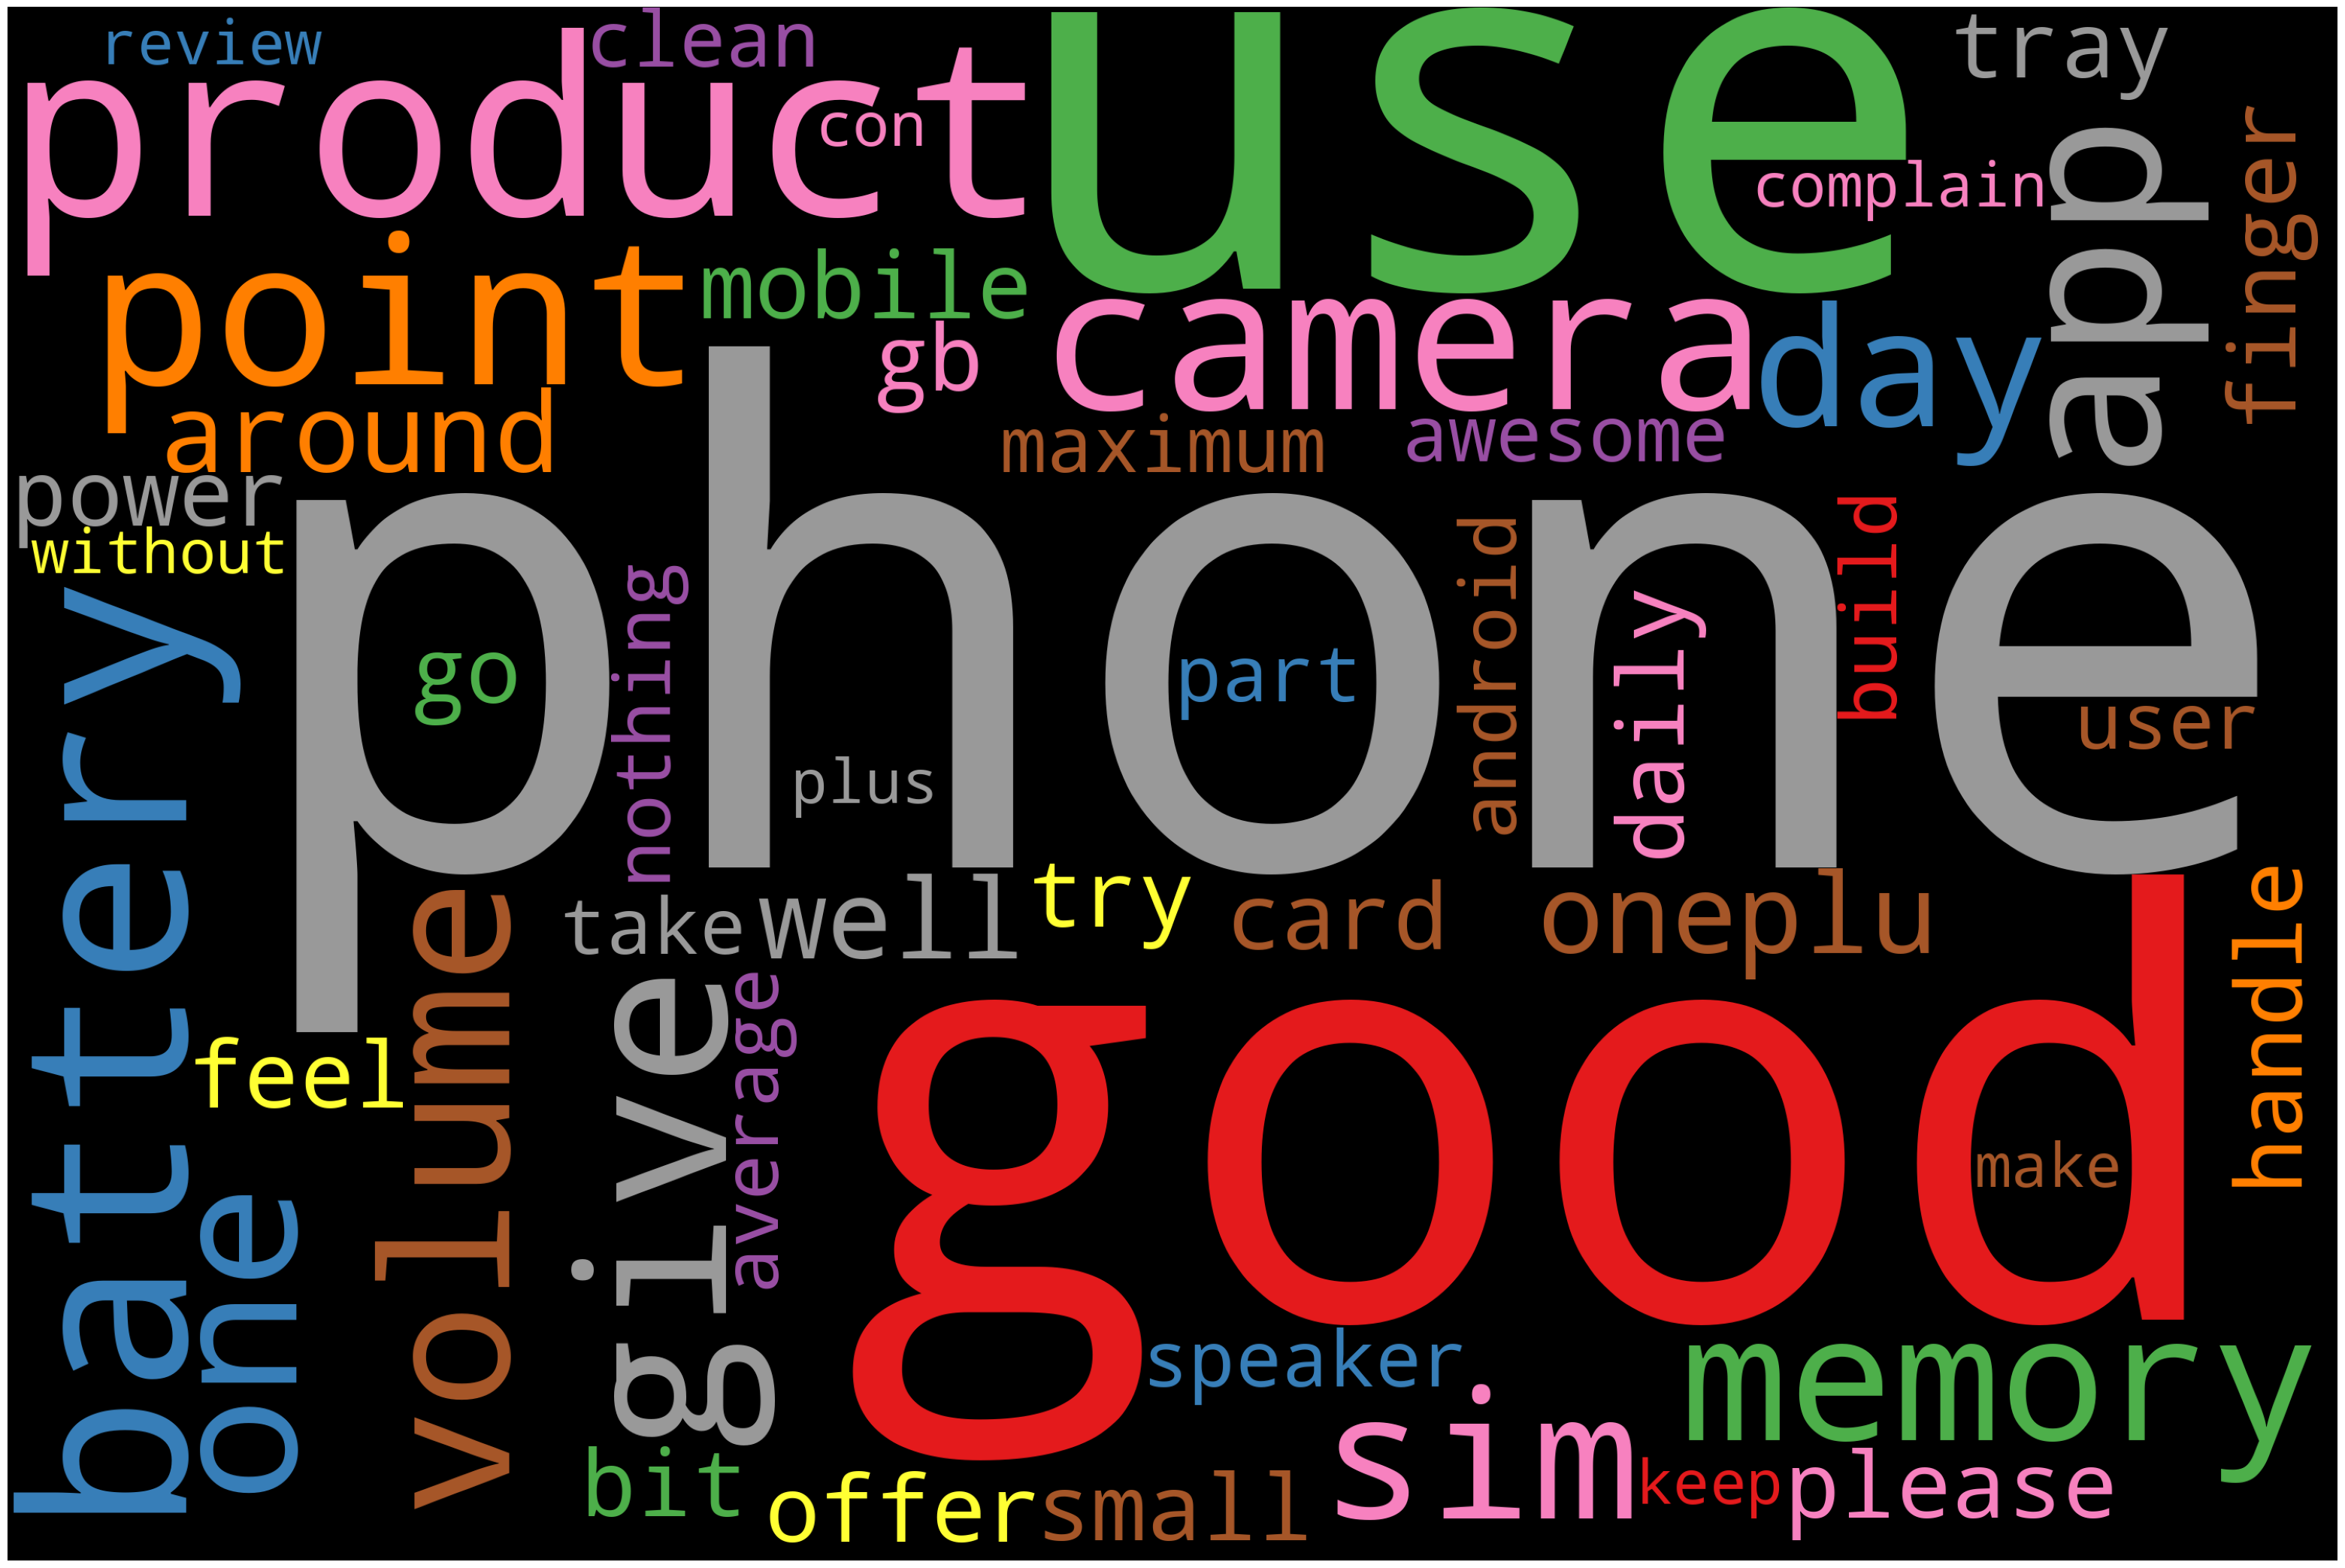

In [56]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_review)
plot_cloud(wordcloud)

In [57]:
nlp=spacy.load('en_core_web_sm')
one_block=clean_review
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [58]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['The product is good but I m not satisy with its sim tray.',
 'I have 2 sim and 1 memory card.',
 'How can I used them togher in this product?',
 'If you have any sim tray for this product which has space of 2sim and memory card .',
 'so please give , or otherwise please exchange it with other mobile which has all these facilities.',
 'Thank you.',
 "I've purchased the 6GB version of this phone which comes with an extendable 2 GB RAM (virtual memory) capability.Good phone, but being the least expensive category offering from One-plus, there are some small evident points that will get noticed.",
 'First thing is the confusing placement of the power button (and hence the finger sensor).',
 'Daily handling of the mobile phone feels a bit annoying with fingers locking/un-locking the phone while you try to handle it and place it into Your pockets.',
 'Although this is not a big problem, it is still something to think about.',
 'The second point is about lag here and there (only to a notice

In [59]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

sentence
0   The product is good but I m not satisy with it...
1                     I have 2 sim and 1 memory card.
2         How can I used them togher in this product?
3   If you have any sim tray for this product whic...
4   so please give , or otherwise please exchange ...
5                                          Thank you.
6   I've purchased the 6GB version of this phone w...
7   First thing is the confusing placement of the ...
8   Daily handling of the mobile phone feels a bit...
9   Although this is not a big problem, it is stil...
10  The second point is about lag here and there (...
11       The third point is about the speaker volume.
12  The speaker is good only at its near maximum l...
13  The fourth point and final one is about the ca...
14  Photos taken in day light especially on skin t...
15  LED flash is average and could have been bette...
16  Battery life is very good and its re-charging ...
17  Build of the phone is apt and will survive nor...
18                 The Phone does feel solid in hand.
19  Stock android is clean and nothing to complain...
20              I will try to keep this review short.
21  This review is just from the perspective of an...
22        Camera is pretty good no cons about this.2.
23  Software is sweet and other little features fr...
24  There aren't any negatives about speed or powe...
25  Build quality is good as well given that you g...
26  If you browse internet use camera for some tim...
27  But given that high speed charger, battery isn...
28  Battery backup is really nice, camera also awe...
29  Very good experience Worthy for money VERY VER...
30                             it takes around 30min.
31                   So a better product under bugget

In [70]:
affin=pd.read_csv('Afinn (1).csv',sep=',',encoding='Latin-1')
affin

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [71]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [72]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [73]:
calculate_sentiment(text='great')

3

In [74]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      3
1      0
2      0
3      0
4      2
5      2
6      3
7     -2
8     -2
9     -1
10     3
11     0
12     5
13    -1
14     0
15     9
16     8
17     0
18     2
19     3
20     0
21    -2
22     3
23     2
24    -2
25     3
26     4
27     4
28     7
29    12
30     0
31     0
Name: sentiment_value, dtype: int64

In [75]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0     13
1      8
2      9
3     18
4     17
5      2
6     39
7     15
8     27
9     14
10    23
11     8
12    29
13    18
14    14
15    32
16    26
17    15
18     7
19    31
20     8
21    54
22     8
23    14
24    21
25    37
26    38
27    71
28     8
29    30
30     4
31     6
Name: word_count, dtype: int64

In [76]:
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value  \
1                     I have 2 sim and 1 memory card.                0   
2         How can I used them togher in this product?                0   
3   If you have any sim tray for this product whic...                0   
7   First thing is the confusing placement of the ...               -2   
8   Daily handling of the mobile phone feels a bit...               -2   
9   Although this is not a big problem, it is stil...               -1   
11       The third point is about the speaker volume.                0   
13  The fourth point and final one is about the ca...               -1   
14  Photos taken in day light especially on skin t...                0   
17  Build of the phone is apt and will survive nor...                0   
20              I will try to keep this review short.                0   
21  This review is just from the perspective of an...               -2   
24  There aren't any negatives about speed or powe...               -2   
30                             it takes around 30min.                0   
31                   So a better product under bugget                0   

    word_count  
1            8  
2            9  
3           18  
7           15  
8           27  
9           14  
11           8  
13          18  
14          14  
17          15  
20           8  
21          54  
24          21  
30           4  
31           6

In [77]:
sent_df[sent_df['sentiment_value']>0]

sentence  sentiment_value  \
0   The product is good but I m not satisy with it...                3   
4   so please give , or otherwise please exchange ...                2   
5                                          Thank you.                2   
6   I've purchased the 6GB version of this phone w...                3   
10  The second point is about lag here and there (...                3   
12  The speaker is good only at its near maximum l...                5   
15  LED flash is average and could have been bette...                9   
16  Battery life is very good and its re-charging ...                8   
18                 The Phone does feel solid in hand.                2   
19  Stock android is clean and nothing to complain...                3   
22        Camera is pretty good no cons about this.2.                3   
23  Software is sweet and other little features fr...                2   
25  Build quality is good as well given that you g...                3   
26  If you browse internet use camera for some tim...                4   
27  But given that high speed charger, battery isn...                4   
28  Battery backup is really nice, camera also awe...                7   
29  Very good experience Worthy for money VERY VER...               12   

    word_count  
0           13  
4           17  
5            2  
6           39  
10          23  
12          29  
15          32  
16          26  
18           7  
19          31  
22           8  
23          14  
25          37  
26          38  
27          71  
28           8  
29          30

In [78]:
sent_df['index']=range(0,len(sent_df))
sent_df

sentence  sentiment_value  \
0   The product is good but I m not satisy with it...                3   
1                     I have 2 sim and 1 memory card.                0   
2         How can I used them togher in this product?                0   
3   If you have any sim tray for this product whic...                0   
4   so please give , or otherwise please exchange ...                2   
5                                          Thank you.                2   
6   I've purchased the 6GB version of this phone w...                3   
7   First thing is the confusing placement of the ...               -2   
8   Daily handling of the mobile phone feels a bit...               -2   
9   Although this is not a big problem, it is stil...               -1   
10  The second point is about lag here and there (...                3   
11       The third point is about the speaker volume.                0   
12  The speaker is good only at its near maximum l...                5   
13  The fourth point and final one is about the ca...               -1   
14  Photos taken in day light especially on skin t...                0   
15  LED flash is average and could have been bette...                9   
16  Battery life is very good and its re-charging ...                8   
17  Build of the phone is apt and will survive nor...                0   
18                 The Phone does feel solid in hand.                2   
19  Stock android is clean and nothing to complain...                3   
20              I will try to keep this review short.                0   
21  This review is just from the perspective of an...               -2   
22        Camera is pretty good no cons about this.2.                3   
23  Software is sweet and other little features fr...                2   
24  There aren't any negatives about speed or powe...               -2   
25  Build quality is good as well given that you g...                3   
26  If you browse internet use camera for some tim...                4   
27  But given that high speed charger, battery isn...                4   
28  Battery backup is really nice, camera also awe...                7   
29  Very good experience Worthy for money VERY VER...               12   
30                             it takes around 30min.                0   
31                   So a better product under bugget                0   

    word_count  index  
0           13      0  
1            8      1  
2            9      2  
3           18      3  
4           17      4  
5            2      5  
6           39      6  
7           15      7  
8           27      8  
9           14      9  
10          23     10  
11           8     11  
12          29     12  
13          18     13  
14          14     14  
15          32     15  
16          26     16  
17          15     17  
18           7     18  
19          31     19  
20           8     20  
21          54     21  
22           8     22  
23          14     23  
24          21     24  
25          37     25  
26          38     26  
27          71     27  
28           8     28  
29          30     29  
30           4     30  
31           6     31

<ipython-input-79-31ec47e7b788>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])


<Axes: xlabel='sentiment_value', ylabel='Density'>

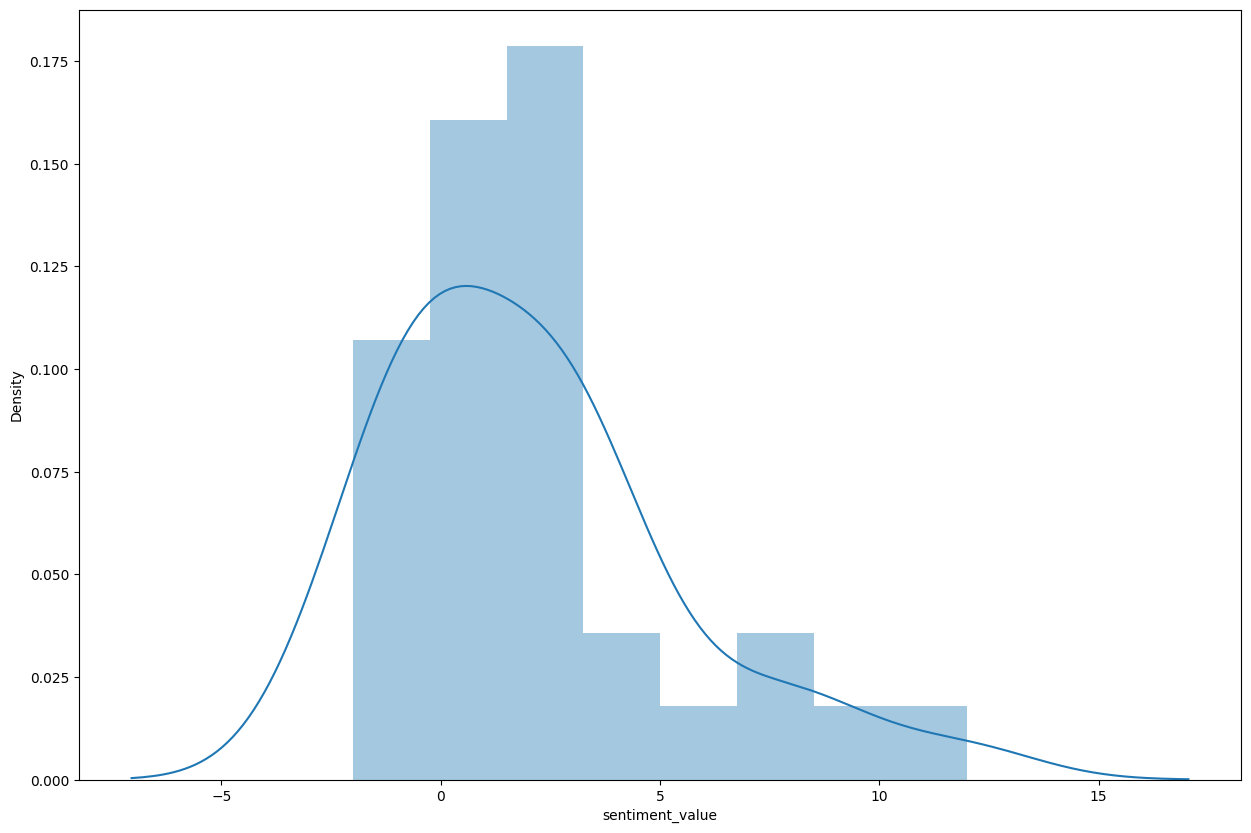

In [79]:
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

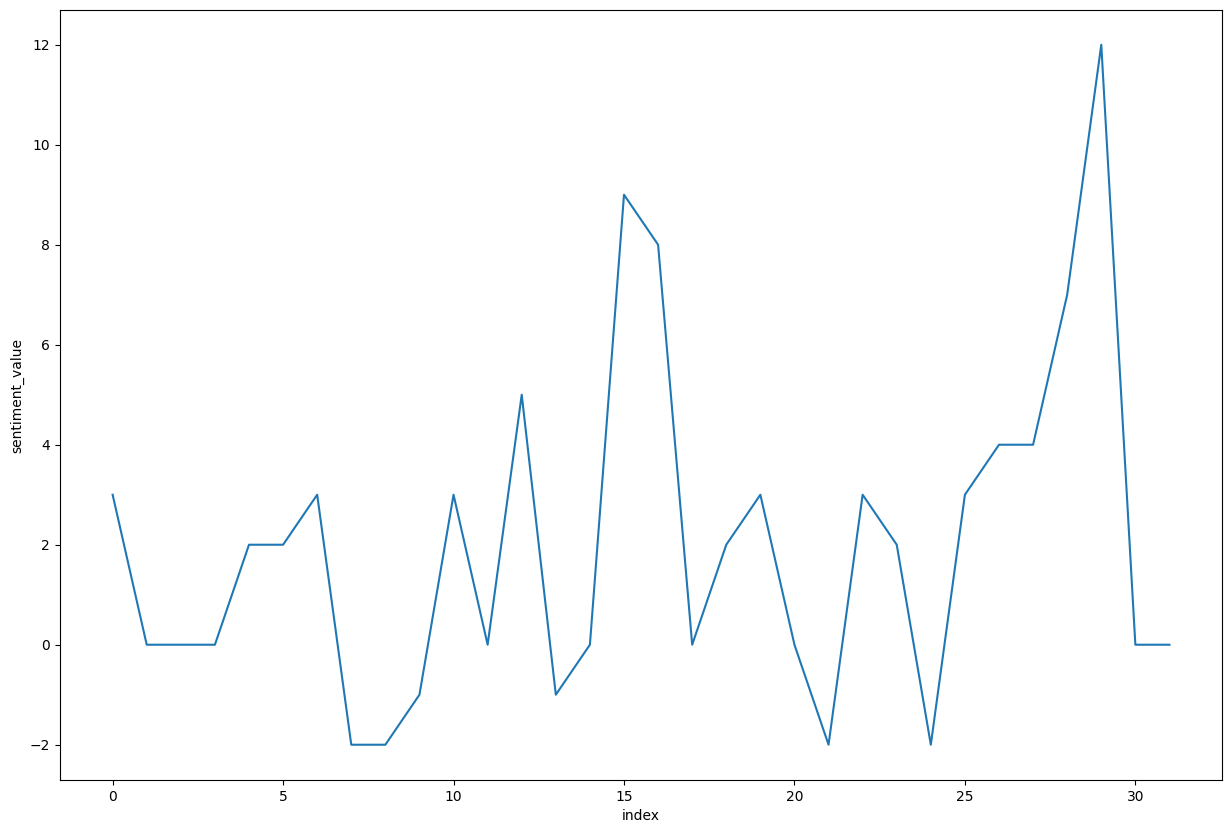

In [80]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)